In [1]:
from sklearn.datasets import fetch_openml #Using sklearn's repository to load MNIST dataset into my platform
                                         

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
mnist # (viewing all the raw data)

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

In [4]:
set_x = mnist['data']

set_y = mnist['target']

In [5]:
set_x[0]


array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [6]:
set_y[0]

'5'

In [7]:
set_x.shape # viewing the data array

set_y.shape # viewing the target array

(70000,)

In [8]:
%matplotlib
import matplotlib
import matplotlib.pyplot as pt


Using matplotlib backend: Qt5Agg


In [9]:
ran_dig = set_x[501] # picking up a random data array

ran_dig_im = ran_dig.reshape(28,28) # reshaping it to 28X28 array 

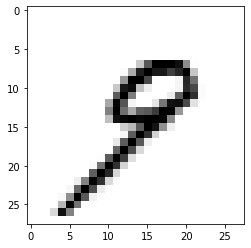

In [10]:
pt.imshow(ran_dig_im, cmap=matplotlib.cm.binary, interpolation="nearest")

In [11]:
set_y[501] # viewing the target element

'9'

In [12]:
# The MNIST dataset has already been splitted into training and testing datasets
# The first 60k falls under traning and the rest 10k is testing set

In [13]:
set_x_trn = set_x[:60000] # splitting the first 60k for the traning set

set_x_tst = set_x[60000:] # labelling the rest for testing set

In [14]:
set_y_trn = set_y[:60000] # again, splitting the target dataset into train and test modules

set_y_tst = set_y[60000:]

In [15]:
# shuffling 
import numpy as np

shuff_in = np.random.permutation(60000)

set_x_trn = set_x_trn[shuff_in]

set_y_trn = set_y_trn[shuff_in]

In [16]:
print(set_x_trn.shape)
print(set_y_trn.shape)
print(set_x_tst.shape)
print(set_y_tst.shape)


(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [17]:
#setting up a classifier for the DIGIT TWO
set_y_trn = set_y_trn.astype(np.int8)  
set_y_tst = set_y_tst.astype(np.int8)

In [18]:
set_y_trn_2 = (set_y_trn == 2) #converting it into an array of true and false

print(set_y_trn_2)

[ True False False ... False False False]


In [19]:
set_y_tst_2 = (set_y_tst == 2) #simalary...........

set_y_trn_2

array([ True, False, False, ..., False, False, False])

In [20]:
from sklearn.linear_model import LogisticRegression 
clf = LogisticRegression(tol = 0.1) # setted tolerance as 0.1 as it was showing error otherwise
clf.fit(set_x_trn, set_y_trn_2)


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.1, verbose=0,
                   warm_start=False)

In [21]:
clf.predict([ran_dig]) #as the digit is 9. so false

array([False])

In [25]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(clf, set_x_trn, set_y_trn_2, cv=3, scoring="accuracy" )

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
print(accuracy)

[0.978  0.9781 0.9777]


In [27]:
accuracy.mean() # accuracy of predicting a digit TWO is 97.79%

0.9779333333333332